In [2]:
%matplotlib inline
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#サンプルデータ取得
df1 = pd.read_excel('methanol.ods',engine="odf")
df1

,#oftry,Si/Al2,Ion exchange rate(%),TON for CH3OH + HCHO(molMeOH+HCHO/molCu),CH3OH + HCHO selectivity(%)
0,0,5.2,31.2,0.0,100
1,0,5.2,34.1,0.0,100
2,0,5.2,44.0,0.0,100
3,0,5.2,67.0,0.0,100
4,0,7.2,34.2,0.1,29
5,0,7.2,39.9,0.1,27
6,0,7.2,50.4,0.1,28
7,0,7.2,71.3,0.0,100
8,0,7.2,81.5,0.0,100
9,0,10.0,39.8,1.2,100


In [3]:
#oftry=0のみ可視化
df2 = df1[df1['#oftry']==0]
df2 = df2.rename(columns={'Ion exchange rate(%)':'Cu IER',
                   'TON for CH3OH + HCHO(molMeOH+HCHO/molCu)':'TON',
                   'CH3OH + HCHO selectivity(%)':'selectivity'})
df2

,#oftry,Si/Al2,Cu IER,TON,selectivity
0,0,5.2,31.2,0.0,100
1,0,5.2,34.1,0.0,100
2,0,5.2,44.0,0.0,100
3,0,5.2,67.0,0.0,100
4,0,7.2,34.2,0.1,29
5,0,7.2,39.9,0.1,27
6,0,7.2,50.4,0.1,28
7,0,7.2,71.3,0.0,100
8,0,7.2,81.5,0.0,100
9,0,10.0,39.8,1.2,100


<IPython.core.display.Javascript object>


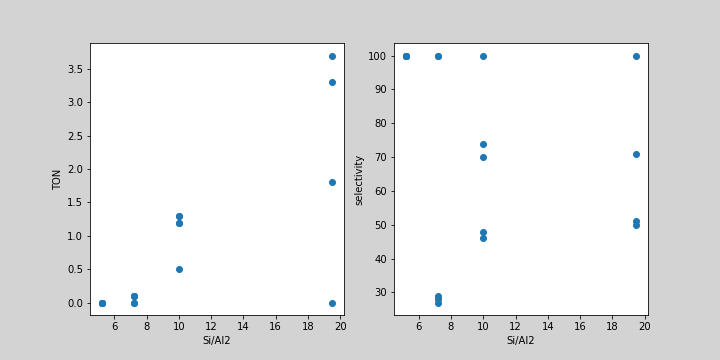

In [12]:
#Si/AlとTON、選択性
#figure生成backtrack
fig = plt.figure(figsize=(10,5),facecolor="lightgray")

#axes生成
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#ラベル付
ax1.set_xlabel('Si/Al2')
ax1.set_ylabel('TON')
ax2.set_xlabel('Si/Al2')
ax2.set_ylabel('selectivity')

#plot
ax1.scatter(df2['Si/Al2'],df2['TON'])
ax2.scatter(df2['Si/Al2'],df2['selectivity'])

#adjustment
fig.subplots_adjust(wspace=0.2,hspace=0)

<IPython.core.display.Javascript object>


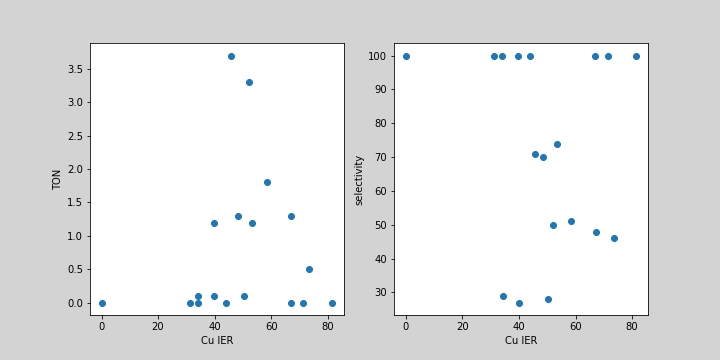

In [8]:
#CuIERとTON、選択性
#figure,axesを生成
fig, axes = plt.subplots(1,2,figsize=(10,5),facecolor="lightgray")
#plot
for i, j in zip(axes, ["TON","selectivity"]):
    i.scatter(df2["Cu IER"],df2[j])
    i.set_xlabel("Cu IER")
    i.set_ylabel(j)

#adjustment
fig.subplots_adjust(wspace=0.2,hspace=0)

<IPython.core.display.Javascript object>


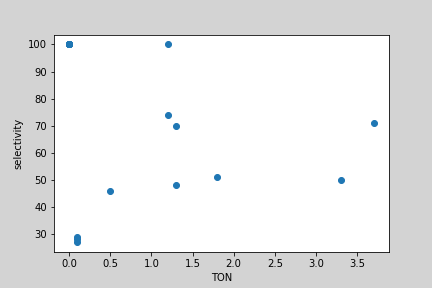

In [9]:
#TONとselectivity
fig = plt.figure(facecolor=("lightgray"))
ax = fig.add_subplot()
#plot
ax.set_xlabel("TON")
ax.set_ylabel("selectivity")
ax.scatter(df2["TON"], df2["selectivity"])
plt.show()

<IPython.core.display.Javascript object>


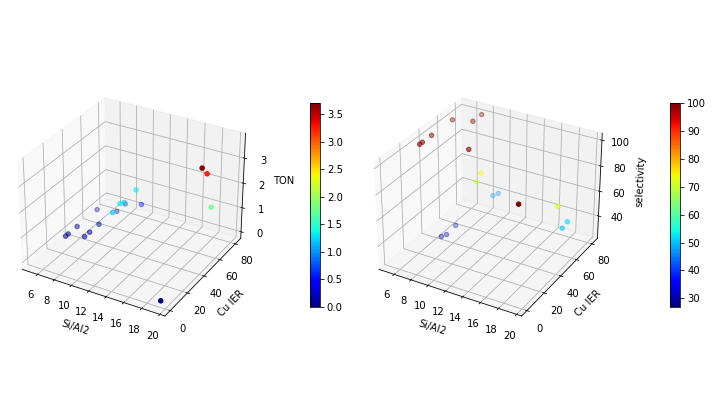

In [7]:
#各パラメータの三次元プロット
#figureを生成
fig, axes = plt.subplots(1, 2,figsize=(10,5),
                         subplot_kw=dict(projection="3d"), constrained_layout = True)
#plot
for i, j in zip(axes, ["TON", "selectivity"]):
    i.set_xlabel("Si/Al2")
    i.set_ylabel("Cu IER")
    i.set_zlabel(j)
    p = i.scatter(df2["Si/Al2"], df2["Cu IER"], df2[j],
                  c = df2[j],cmap='jet')
    fig.colorbar(p, ax = i, pad = 0.15, fraction = 0.04)
    
    
